In [1]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
from keras.applications.xception import preprocess_input
import numpy as np

loaded_model = load_model('cats_and_dogs.h5')

Using TensorFlow backend.




In [2]:
import pickle
f = open('dict.pkl','rb')
classes = pickle.load(f)
f.close()

In [3]:
print('Classes dict: {}'.format(classes))

Classes dict: {'Abyssinian': 0, 'American curl': 1, 'Beagle': 2, 'Bengal': 3, 'British shorthair': 4, 'Bulldog': 5, 'Chihuahua': 6, 'Corgi': 7, 'German Shepherd': 8, 'Golden Retriever': 9, 'Maltese': 10, 'Pomeranian': 11, 'Samoyed': 12, 'Scottish Fold': 13, 'Siamese': 14, 'Siberian Forest': 15, 'Siberian Husky': 16, 'Somali': 17, 'Sphynx': 18, 'Turkish Angora': 19}


In [4]:
def get_single_class_name(val): 
    for key, value in classes.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

def get_array_class_name(arr):
    l = []
    for key,value in classes.items():
        for item in arr:
            if value == item:
                l.append(key)
    return l

In [5]:
# Single predict
sample_path = 'sample_images/'
img_path = sample_path+'shorthair_1.jpg'
img = load_img(img_path, target_size=(299, 299))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = loaded_model.predict(x)
class_index = np.argmax(pred)
print("Class index: {}".format(class_index))
print("Predict: {}".format(get_single_class_name(class_index)))
print("Confidence: {}".format(np.sum(pred[0][class_index]*100)))

Class index: 4
Predict: British shorthair
Confidence: 99.79777932167053


In [6]:
from keras.applications.xception import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import random
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

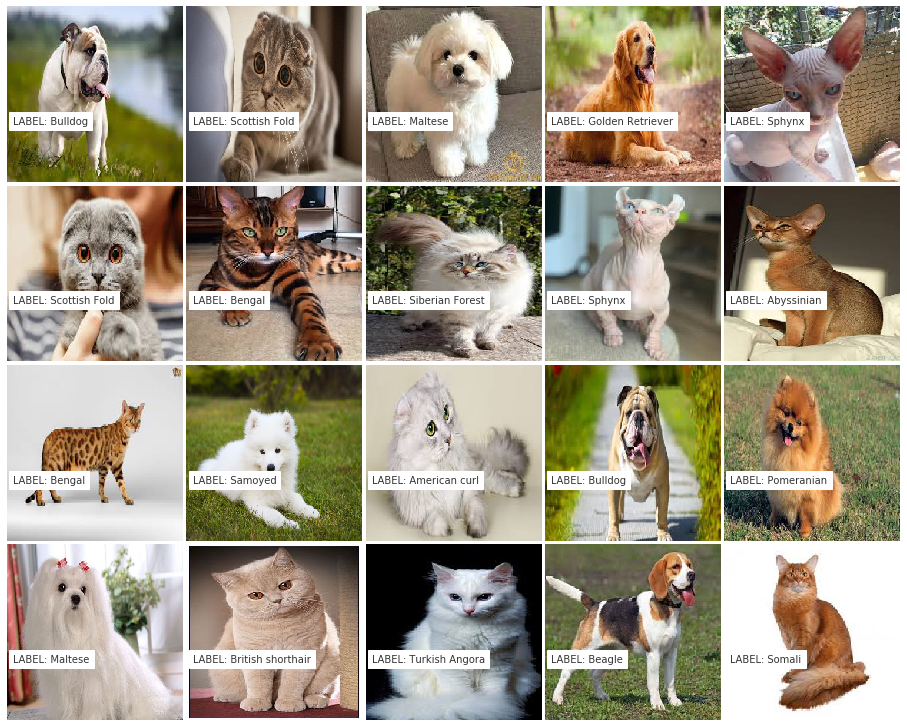

In [7]:
def show_img(img, label, ax):
    ax.imshow(img / 255.)
    ax.text(10, 200, 'LABEL: {}'.format(label), color='k', backgroundcolor='w', alpha=0.8)
    ax.axis('off')

sample_images = os.listdir(sample_path)

fig = plt.figure(1, figsize=(16, 16))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 5), axes_pad=0.05)
for i, img in enumerate(random.sample(sample_images,k=20)):
    img_path = sample_path+img
    pic = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(pic)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = loaded_model.predict(x)
    ax = grid[i]
    show_img(image.img_to_array(pic), label=get_single_class_name(np.argmax(preds[0])), ax=ax)
plt.show()